In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
r=pd.read_csv(r"C:\Users\manga\OneDrive\Desktop\IE\Data Analytics\accident data.csv")
r

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


# renamingin columns

In [6]:
r.columns=['Index','Accident_Severity','Accident_Date','Latitude','Light_Conditions','District_Area','Longitude','Number_of_Casualties','Number_of_Vehicles','Road_Surface_Conditions','Road_Type','Urban_or_Rural_Area','Weather_Conditions','Vehicle_Type']

In [8]:
r.isnull().sum()

Index                          0
Accident_Severity              0
Accident_Date                  0
Latitude                      25
Light_Conditions               0
District_Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [10]:
r.dtypes

Index                       object
Accident_Severity           object
Accident_Date               object
Latitude                   float64
Light_Conditions            object
District_Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [12]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident_Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District_Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [14]:
for i in r.columns:
    print(i,':','\n',r[i].unique())

Index : 
 ['200701BS64157' '200701BS65737' '200701BS66127' ... '201091NM01935'
 '201091NM01964' '201091NM02142']
Accident_Severity : 
 ['Serious' 'Slight' 'Fatal']
Accident_Date : 
 ['05-06-2019' '02-07-2019' '26-08-2019' ... '26-12-2022' '25-07-2022'
 '25-12-2022']
Latitude : 
 [51.506187 51.495029 51.517715 ... 57.585044 57.214898 57.57521 ]
Light_Conditions : 
 ['Darkness - lights lit' 'Daylight' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']
District_Area : 
 ['Kensington and Chelsea' 'Westminster' 'Richmond upon Thames'
 'Hammersmith and Fulham' 'Hounslow' 'Tower Hamlets' 'City of London'
 'Southwark' 'Camden' 'Hackney' 'Islington' 'Barnet' 'Brent' 'Haringey'
 'Merton' 'Ealing' 'Enfield' 'Greenwich' 'Newham'
 'London Airport (Heathrow)' 'Hillingdon' 'Waltham Forest' 'Redbridge'
 'Barking and Dagenham' 'Bromley' 'Havering' 'Croydon' 'Lambeth'
 'Wandsworth' 'Sutton' 'Bexley' 'Lewisham' 'Harrow' 'Kingston upon Thames'
 'Barrow-in-Furness' 'South La

In [16]:
a=r.describe(include='all')
a

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,660679,660679,660679,660654.000000,660679,660679,660653.000000,660679.000000,660679.000000,659953,656159,660664,646551,660679
unique,421020,3,1461,NaN,5,422,NaN,NaN,NaN,5,5,3,8,16
top,2.01E+12,Slight,30-11-2019,NaN,Daylight,Birmingham,NaN,NaN,NaN,Dry,Single carriageway,Urban,Fine no high winds,Car
freq,239478,563801,704,NaN,484880,13491,NaN,NaN,NaN,447821,492143,421663,520885,497992
mean,NaN,NaN,NaN,52.553866,NaN,NaN,-1.431210,1.357040,1.831255,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.406922,NaN,NaN,1.383330,0.824847,0.715269,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,49.914430,NaN,NaN,-7.516225,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,51.490690,NaN,NaN,-2.332291,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,52.315641,NaN,NaN,-1.411667,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,53.453452,NaN,NaN,-0.232869,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [18]:
for i in ['Latitude','Longitude']:
    r[i].replace(np.NaN,a[i][4],inplace=True)

C:\Users\manga\AppData\Local\Temp\ipykernel_24580\514305629.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r[i].replace(np.NaN,a[i][4],inplace=True)


In [20]:
for i in ['Road_Surface_Conditions','Road_Type','Urban_or_Rural_Area','Weather_Conditions']:
    r[i].replace(np.NaN,a[i][2],inplace=True)

C:\Users\manga\AppData\Local\Temp\ipykernel_24580\3645066657.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r[i].replace(np.NaN,a[i][2],inplace=True)


In [22]:
r.isnull().sum()

Index                      0
Accident_Severity          0
Accident_Date              0
Latitude                   0
Light_Conditions           0
District_Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

# Displot

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


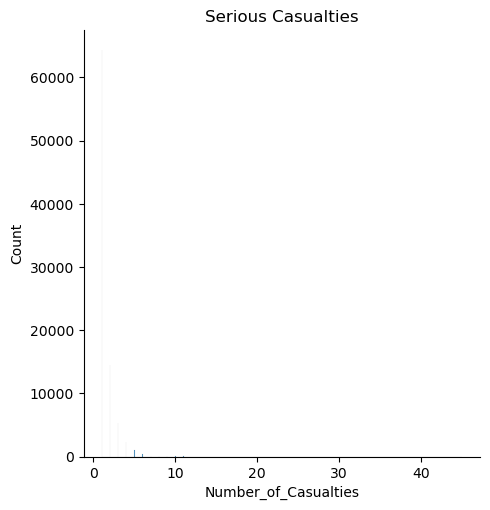

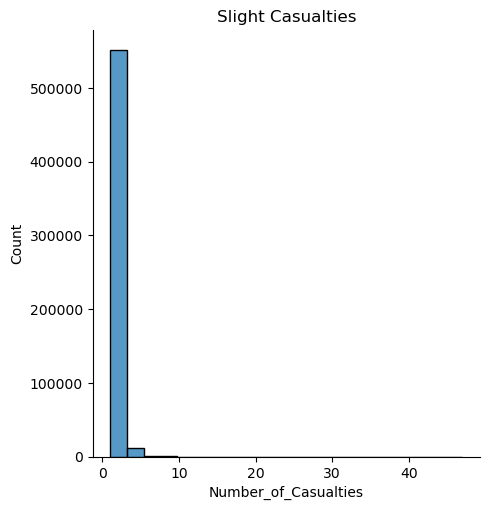

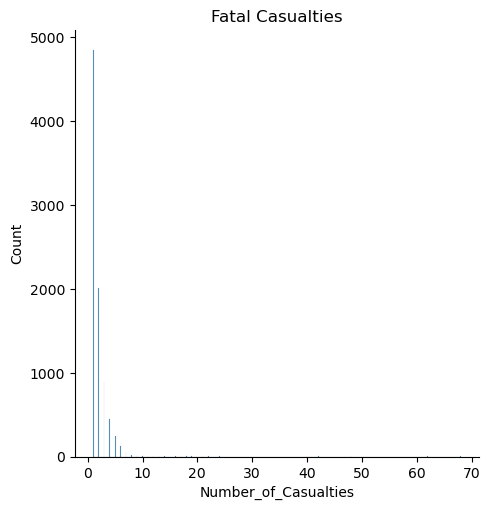

In [25]:
sns.displot(r.Number_of_Casualties[r.Accident_Severity=='Serious'])
plt.title('Serious Casualties')
sns.displot(r.Number_of_Casualties[r.Accident_Severity=='Slight'])
plt.title('Slight Casualties')
sns.displot(r.Number_of_Casualties[r.Accident_Severity=='Fatal'])
plt.title('Fatal Casualties')
plt.show()

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

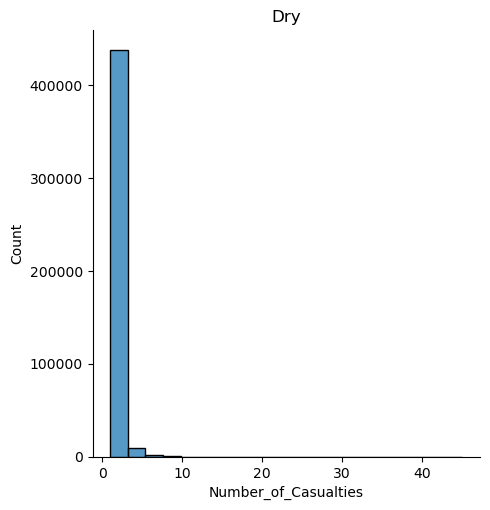

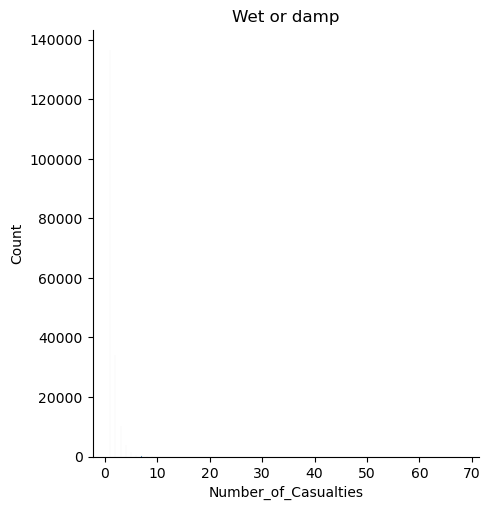

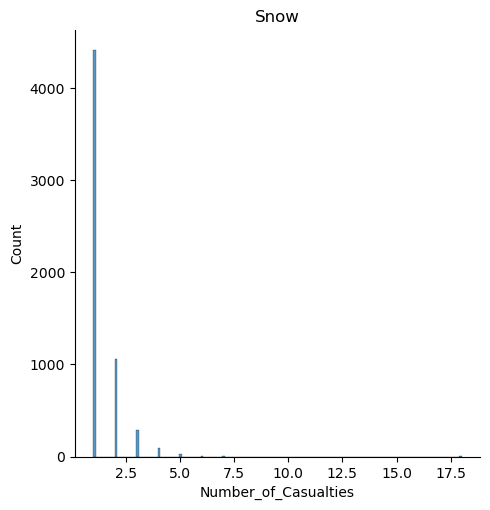

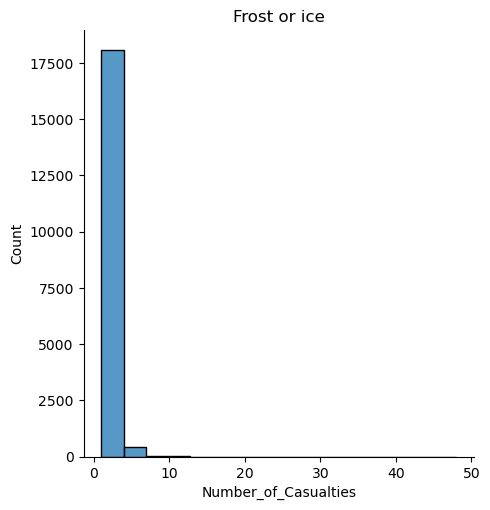

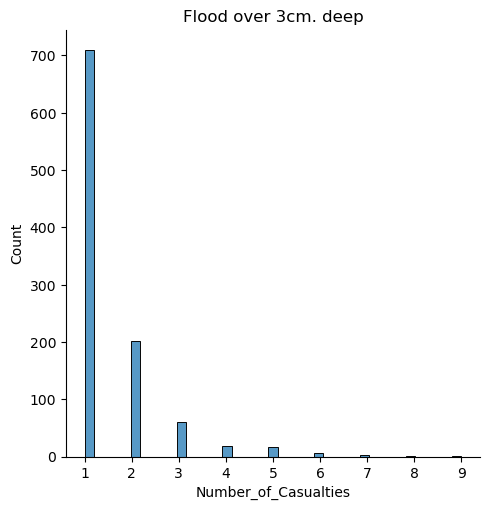

In [26]:
sns.displot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Dry'])
plt.title('Dry')
sns.displot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Wet or damp'])
plt.title('Wet or damp')
sns.displot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Snow'])
plt.title('Snow')
sns.displot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Frost or ice'])
plt.title('Frost or ice')
sns.displot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Flood over 3cm. deep'])
plt.title('Flood over 3cm. deep')
plt.show()

# Distplot

C:\Users\manga\AppData\Local\Temp\ipykernel_24580\2159983738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r.Number_of_Casualties[r.Accident_Severity=='Serious'])
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\AppData\Local\Temp\ipykernel_24580\2159983738.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

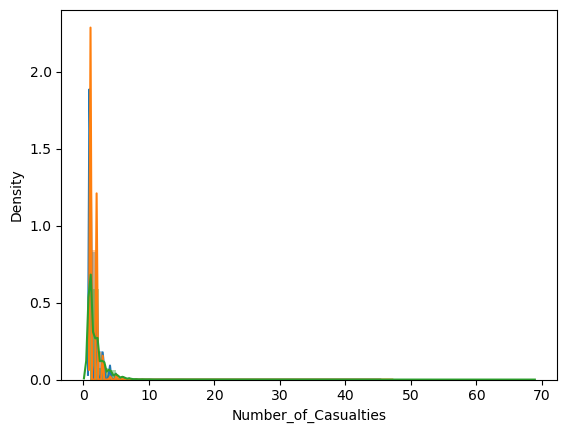

In [30]:
sns.distplot(r.Number_of_Casualties[r.Accident_Severity=='Serious'])
sns.distplot(r.Number_of_Casualties[r.Accident_Severity=='Slight'])
sns.distplot(r.Number_of_Casualties[r.Accident_Severity=='Fatal'])
plt.show()

C:\Users\manga\AppData\Local\Temp\ipykernel_24580\2165197958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Dry'])
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\AppData\Local\Temp\ipykernel_24580\2165197958.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fi

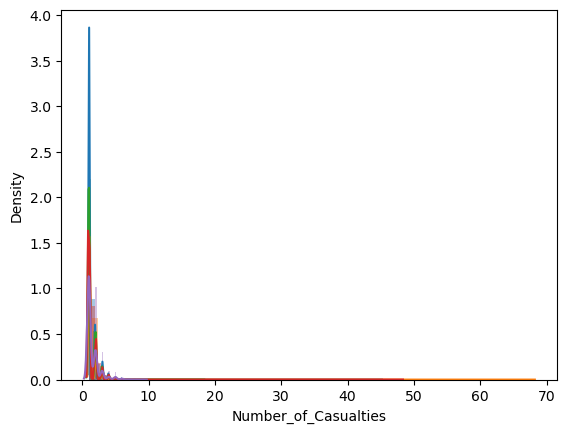

In [32]:
sns.distplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Dry'])
sns.distplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Wet or damp'])
sns.distplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Snow'])
sns.distplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Frost or ice'])
sns.distplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Flood over 3cm. deep'])
plt.show()

# KDE plot

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


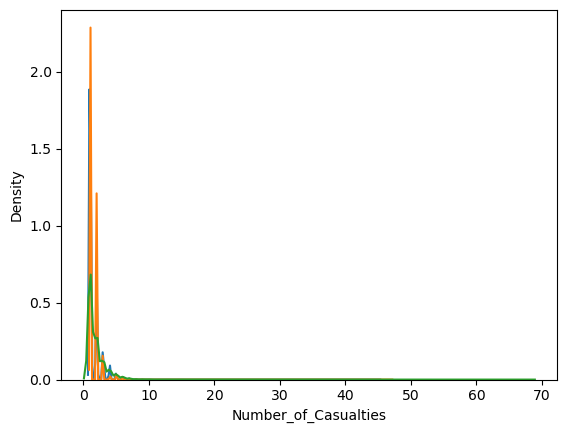

In [35]:
sns.kdeplot(r.Number_of_Casualties[r.Accident_Severity=='Serious'])
sns.kdeplot(r.Number_of_Casualties[r.Accident_Severity=='Slight'])
sns.kdeplot(r.Number_of_Casualties[r.Accident_Severity=='Fatal'])
plt.show()

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

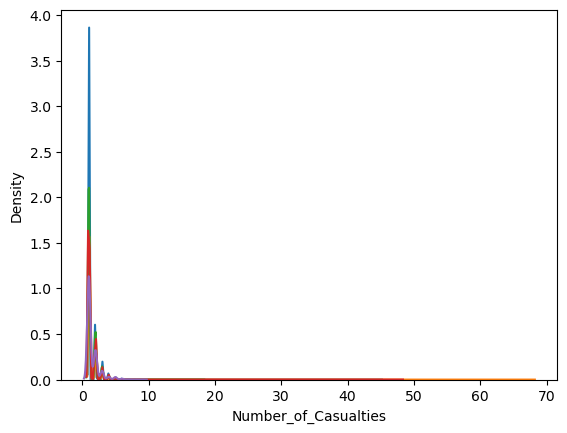

In [37]:
sns.kdeplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Dry'])
sns.kdeplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Wet or damp'])
sns.kdeplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Snow'])
sns.kdeplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Frost or ice'])
sns.kdeplot(r.Number_of_Casualties[r.Road_Surface_Conditions=='Flood over 3cm. deep'])
plt.show()

# Box plot

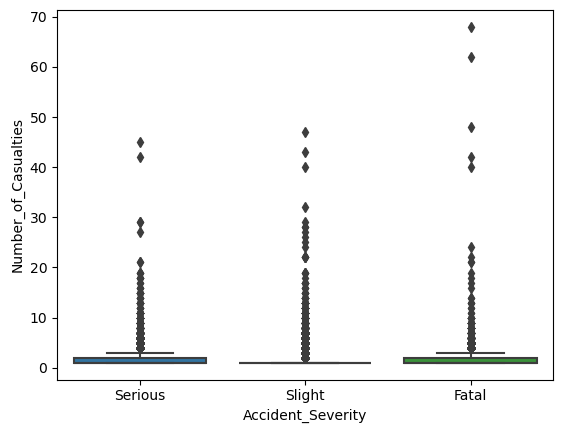

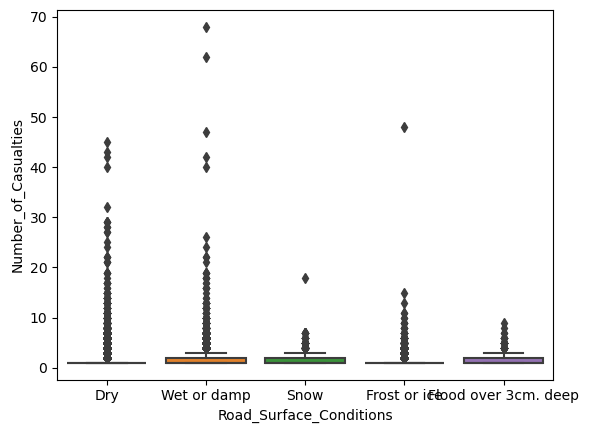

In [40]:
sns.boxplot(x=r.Accident_Severity,y=r.Number_of_Casualties)
plt.show()
sns.boxplot(x=r.Road_Surface_Conditions,y=r.Number_of_Casualties)
plt.show()

# Boxen plot

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


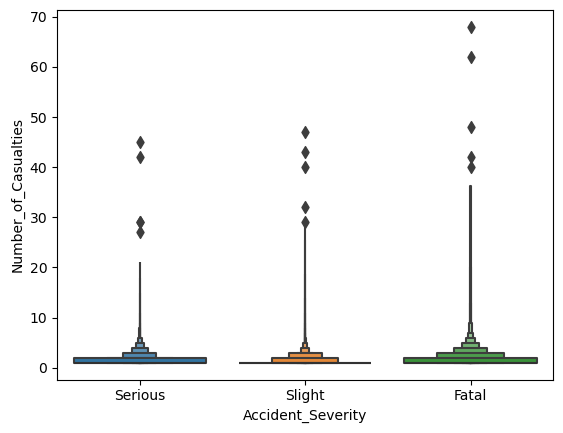

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

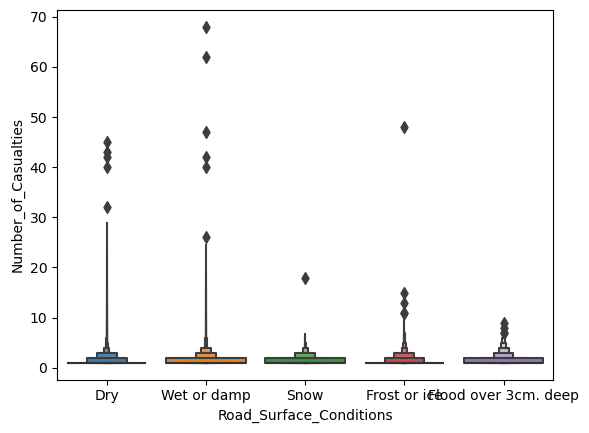

In [43]:
sns.boxenplot(x=r.Accident_Severity,y=r.Number_of_Casualties)
plt.show()
sns.boxenplot(x=r.Road_Surface_Conditions,y=r.Number_of_Casualties)
plt.show()

# strip plot

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


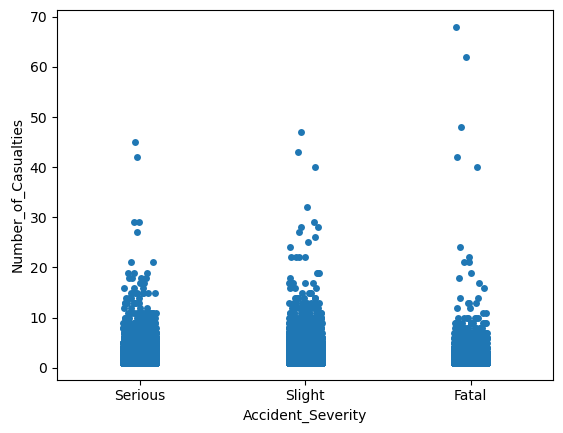

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


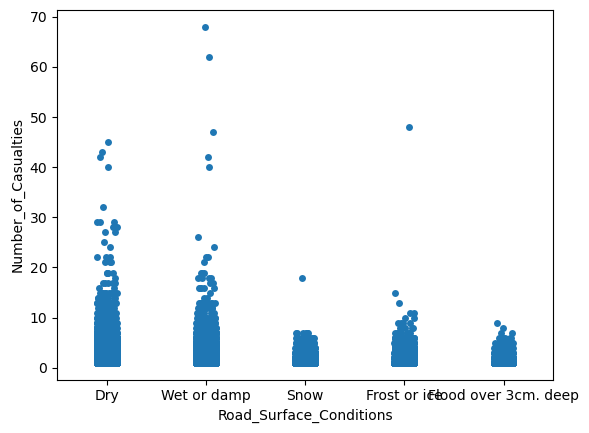

In [46]:
sns.stripplot(x=r.Accident_Severity,y=r.Number_of_Casualties)
plt.show()
sns.stripplot(x=r.Road_Surface_Conditions,y=r.Number_of_Casualties)
plt.show()

# Violin plot

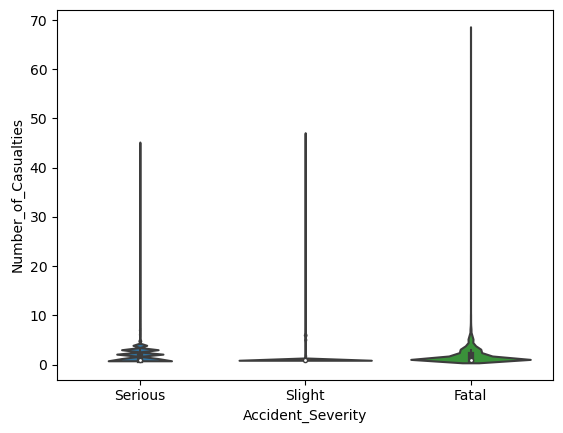

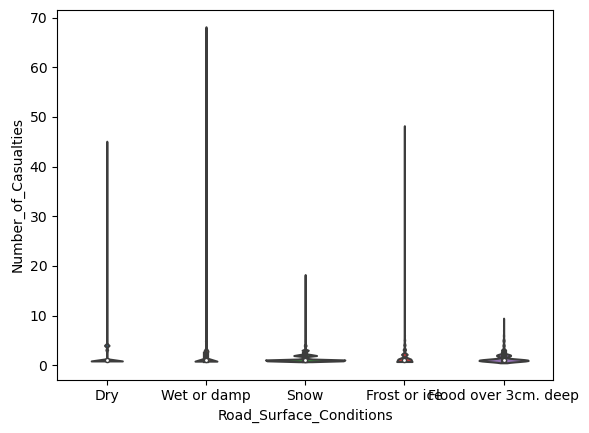

In [49]:
sns.violinplot(x=r.Accident_Severity,y=r.Number_of_Casualties)
plt.show()
sns.violinplot(x=r.Road_Surface_Conditions,y=r.Number_of_Casualties)
plt.show()

# Barplot

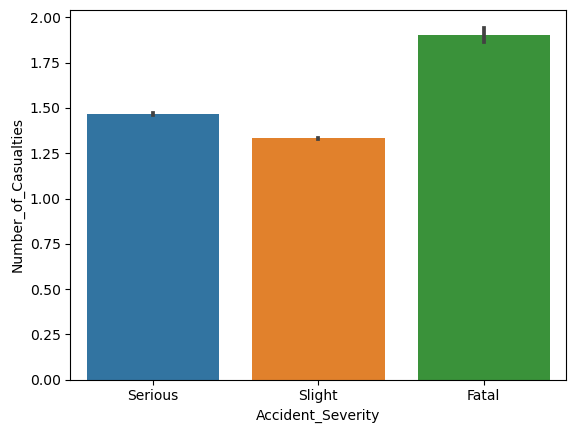

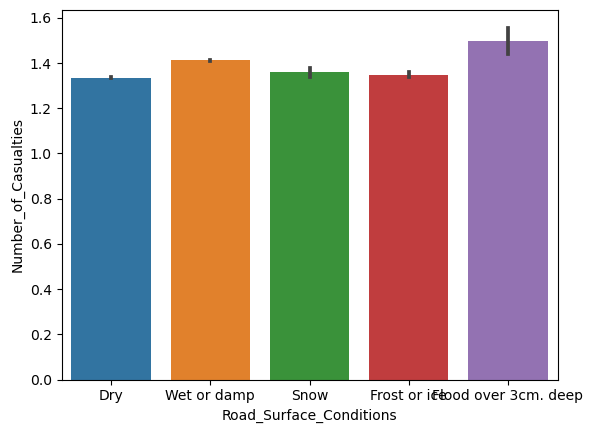

In [52]:
sns.barplot(x=r.Accident_Severity,y=r.Number_of_Casualties)
plt.show()
sns.barplot(x=r.Road_Surface_Conditions,y=r.Number_of_Casualties)
plt.show()

# jointplot

C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

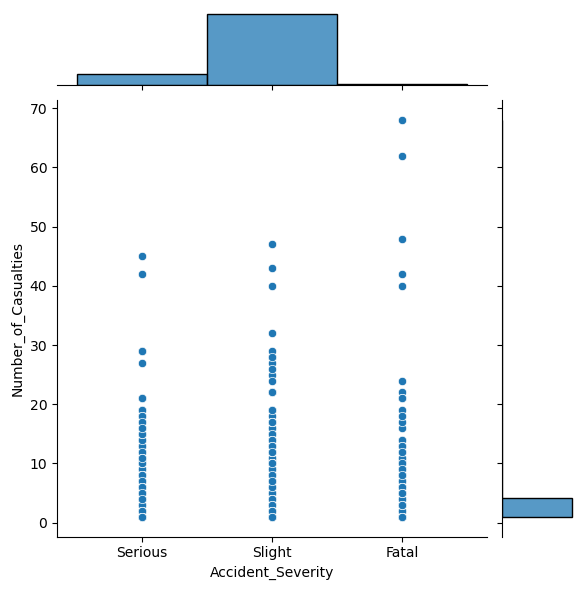

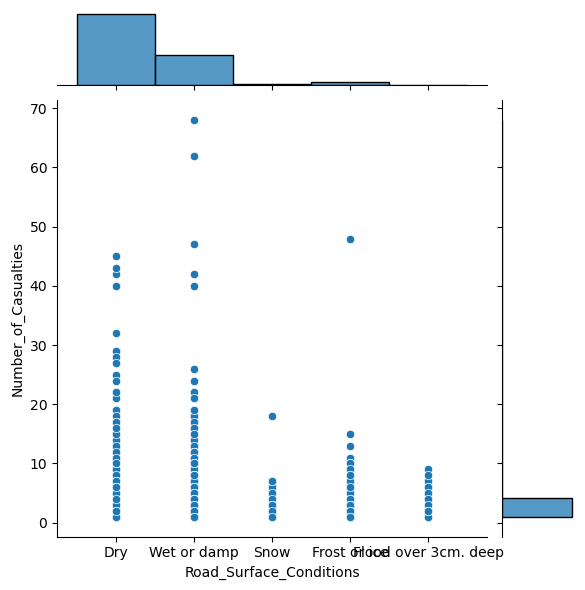

In [55]:
sns.jointplot(x=r.Accident_Severity,y=r.Number_of_Casualties)
sns.jointplot(x=r.Road_Surface_Conditions,y=r.Number_of_Casualties)
plt.show()

# Countplot

<Axes: xlabel='Road_Surface_Conditions', ylabel='count'>

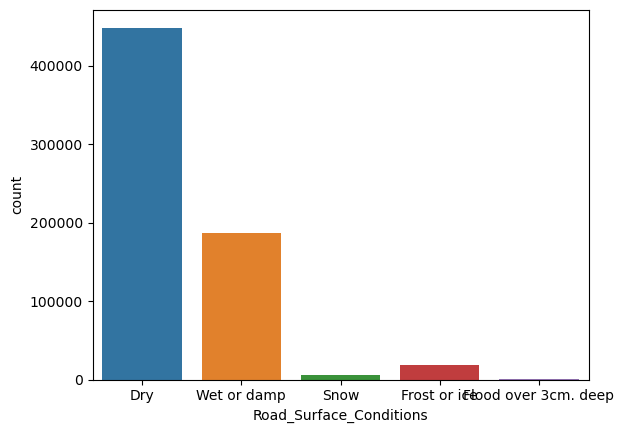

In [58]:
sns.countplot(x=r.Road_Surface_Conditions)

<Axes: xlabel='Accident_Severity', ylabel='count'>

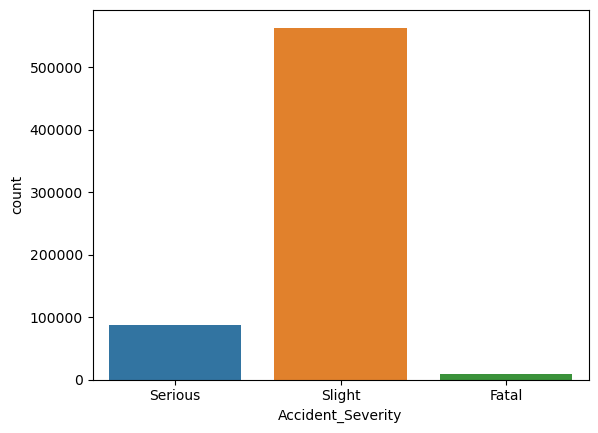

In [60]:
sns.countplot(x=r.Accident_Severity)

# encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

In [65]:
l1=LabelEncoder()
r.Index=l1.fit_transform(r.Index)

In [67]:
l2=LabelEncoder()
r.Accident_Severity=l2.fit_transform(r.Accident_Severity)

In [69]:
l3=LabelEncoder()
r.Accident_Date=l3.fit_transform(r.Accident_Date)

In [71]:
l4=LabelEncoder()
r.Light_Conditions=l4.fit_transform(r.Light_Conditions)

In [73]:
l5=LabelEncoder()
r.District_Area=l5.fit_transform(r.District_Area)

In [75]:
l6=LabelEncoder()
r.Road_Surface_Conditions=l6.fit_transform(r.Road_Surface_Conditions)

In [77]:
r.Road_Surface_Conditions.unique()

array([0, 4, 3, 2, 1])

In [79]:
l = l6.inverse_transform([0, 4, 3, 2, 1])
l

array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice',
       'Flood over 3cm. deep'], dtype=object)

In [81]:
l7=LabelEncoder()
r.Road_Type=l7.fit_transform(r.Road_Type)

In [83]:
l8=LabelEncoder()
r.Urban_or_Rural_Area=l8.fit_transform(r.Urban_or_Rural_Area)

In [85]:
l9=LabelEncoder()
r.Weather_Conditions=l9.fit_transform(r.Weather_Conditions)

In [87]:
l10=LabelEncoder()
r.Vehicle_Type=l10.fit_transform(r.Vehicle_Type)

In [89]:
l11=LabelEncoder()
r.Latitude=l11.fit_transform(r.Latitude)

In [91]:
l12=LabelEncoder()
r.Longitude=l12.fit_transform(r.Longitude)

# input output creation

In [94]:
ip=r.drop('Road_Surface_Conditions',axis=1)
op=r.Road_Surface_Conditions

In [96]:
ip.head()

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,244,1,212,134754,1,185,406225,1,2,3,2,1,2
1,245,1,72,130117,4,185,415073,1,2,3,2,5,2
2,246,1,1228,140617,0,185,405961,1,3,3,2,1,14
3,247,1,748,130300,4,185,407780,1,4,3,2,1,1
4,248,2,128,127215,1,185,410578,1,2,3,2,1,11


In [98]:
op.head()

0    0
1    4
2    0
3    0
4    0
Name: Road_Surface_Conditions, dtype: int32

# train test split

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.8,random_state=3)

In [103]:
x_train.head()

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
411469,264988,2,226,368023,4,286,279838,2,2,3,2,1,2
579094,373406,2,903,283845,4,380,184435,1,3,3,2,1,2
325191,23,1,453,59609,4,401,58565,1,2,3,0,1,2
349882,221234,2,405,499308,4,7,7092,1,1,3,2,1,2
609329,392091,2,1007,224178,4,12,514196,2,2,3,0,1,8


In [105]:
y_train.head()

411469    0
579094    4
325191    0
349882    0
609329    2
Name: Road_Surface_Conditions, dtype: int32

# standardScaler

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train,x_test)

StandardScaler()

# machine learning model (naive bayes)

In [111]:
from  sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)

GaussianNB()

In [113]:
pred=gn.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
a=accuracy_score(pred,y_test)
r=recall_score(pred,y_test,average='macro')
p=precision_score(pred,y_test,average='macro')
f1=f1_score(pred,y_test,average='macro')
print('accuracy: ',a)
print('recall: ',r)
print('precision: ',p)
print('f1 score: ',f1)

accuracy:  0.6787192740812497
recall:  0.17187039372648788
precision:  0.2000615483422088
f1 score:  0.16188013864955403


C:\Users\manga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ConfusionMatrix

In [117]:
from  sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(pred,y_test)
cm

array([[358687,    801,  14816,   4555, 149430],
       [     0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0],
       [     0,      1,     47,    161,     46]], dtype=int64)

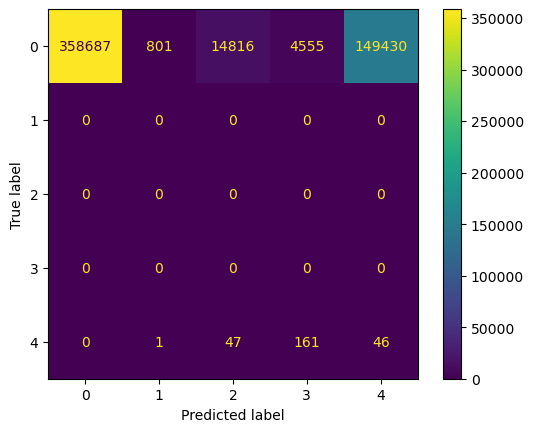

In [119]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()